In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Top 5 zipcodes for 911 calls

In [4]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

Top 5 townships (twp) for 911 calls

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Unique title codes

In [6]:
df['title'].nunique()

110

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Creating a new column called "Reason" that contains this string value.

In [7]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [8]:
df['reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

Most common Reason for a 911 call based off of this new column

In [9]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

Countplot of 911 calls by Reason

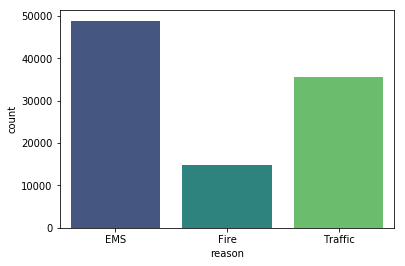

In [10]:
sns.countplot(data = df, x='reason', palette='viridis')

Data type of the objects in the timeStamp column

In [11]:
type(df['timeStamp'].iloc[0])

str

Convert timestamp column from strings to DateTime objects

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
time = df['timeStamp'].iloc[0]
time.hour

17

Create 3 new columns called Hour, Month, and Day of Week

In [14]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [15]:
df[['timeStamp','hour','month','day of week']].head()

,timeStamp,hour,month,day of week
0,2015-12-10 17:40:00,17,12,3
1,2015-12-10 17:40:00,17,12,3
2,2015-12-10 17:40:00,17,12,3
3,2015-12-10 17:40:01,17,12,3
4,2015-12-10 17:40:01,17,12,3


Map the actual string names to the day of the week

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['day of week'] = df['day of week'].map(dmap)

In [18]:
df['day of week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: day of week, dtype: object

Countplot of the Day of Week, month columns with the hue based off of the Reason column

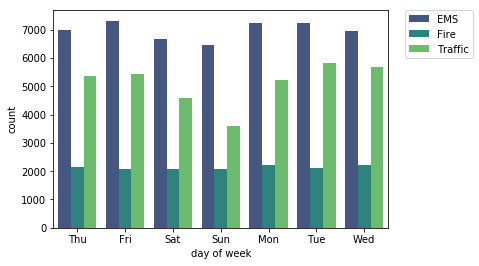

In [19]:
sns.countplot(data = df,x='day of week',hue = 'reason',palette ='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)  #to relocate the legend

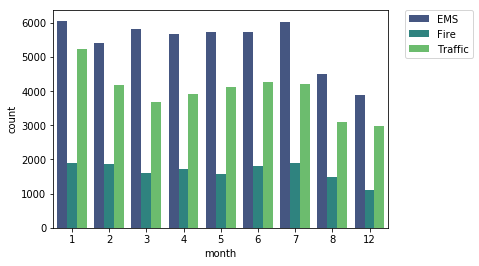

In [20]:
sns.countplot(data = df,x='month',hue = 'reason',palette ='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)  #to relocate the legend

Count of each attribute group by month

In [21]:
df.groupby('month').count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


Simple plot off of the dataframe indicating the count of calls per month

In [22]:
bymonth = df.groupby('month').count()

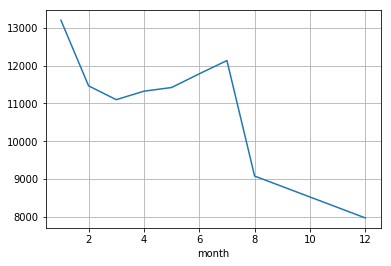

In [23]:
bymonth['lat'].plot()
plt.grid()

Linear fit on the number of calls per month

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


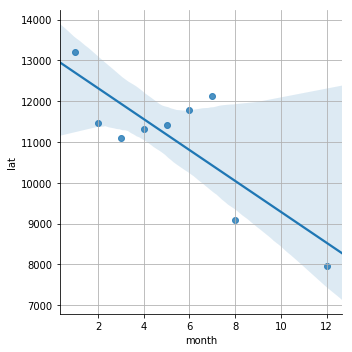

In [24]:
sns.lmplot(data=bymonth.reset_index(),x='month',y='lat')
plt.grid()

Plot of 911 call accordig to the dates

In [25]:
df['date'] = df['timeStamp'].apply(lambda x:x.date())  #creating a date column

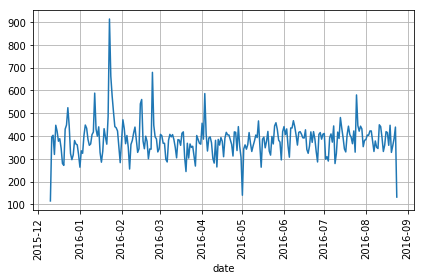

In [26]:
df.groupby('date').count()['lat'].plot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()

3 separate plots with each plot representing a Reason for the 911 call

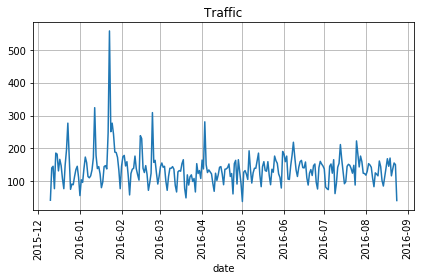

In [27]:
df[df['reason']=='Traffic'].groupby('date').count()['lat'].plot()
plt.xticks(rotation=90)
plt.title('Traffic')
plt.tight_layout()
plt.grid()

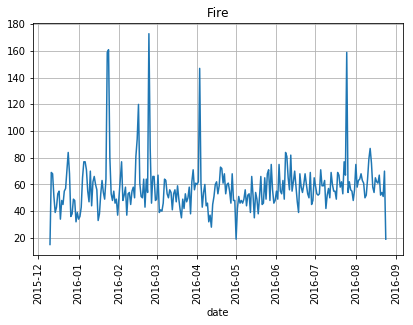

In [28]:
df[df['reason']=='Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')
plt.xticks(rotation=90)
plt.grid()

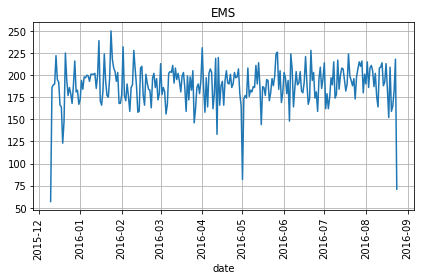

In [29]:
df[df['reason']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid()

Restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.

In [30]:
dayHour = df.groupby(['day of week','hour']).count()['lat'].unstack()
dayHour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Heatmap of the above dataframe

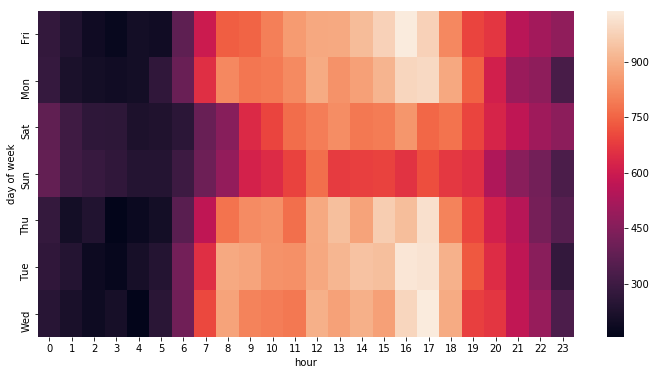

In [31]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour)

Clustermap

<Figure size 864x432 with 0 Axes>

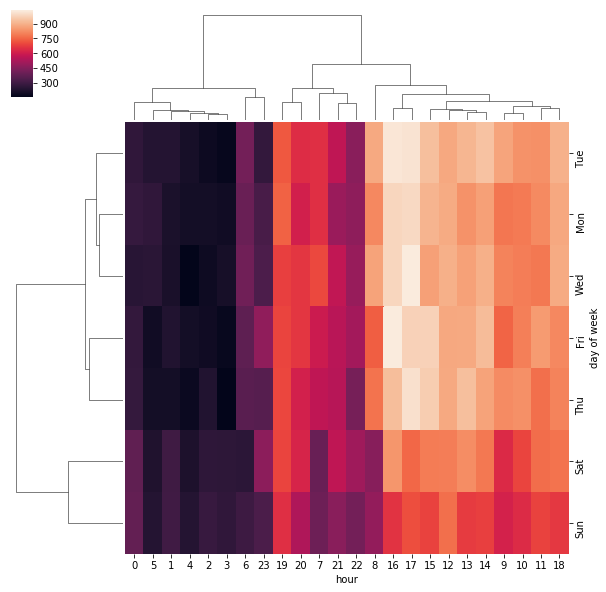

In [32]:
plt.figure(figsize=(12,6))
sns.clustermap(data=dayHour)

Same plots and operations, for a DataFrame that shows the Month as the column

In [33]:
dayMonth = df.groupby(['day of week','month']).count()['lat'].unstack()
dayMonth

month,1,2,3,4,5,6,7,8,12
day of week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


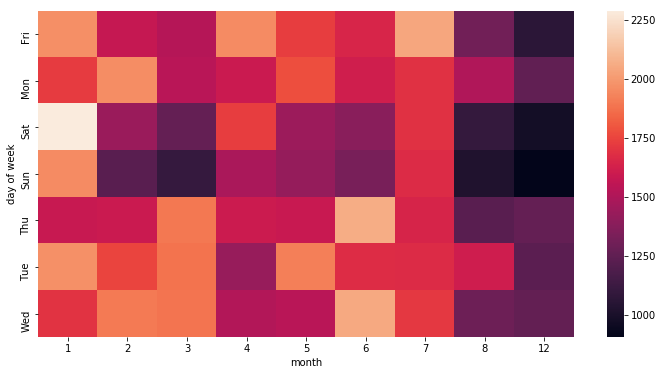

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayMonth)

<Figure size 864x432 with 0 Axes>

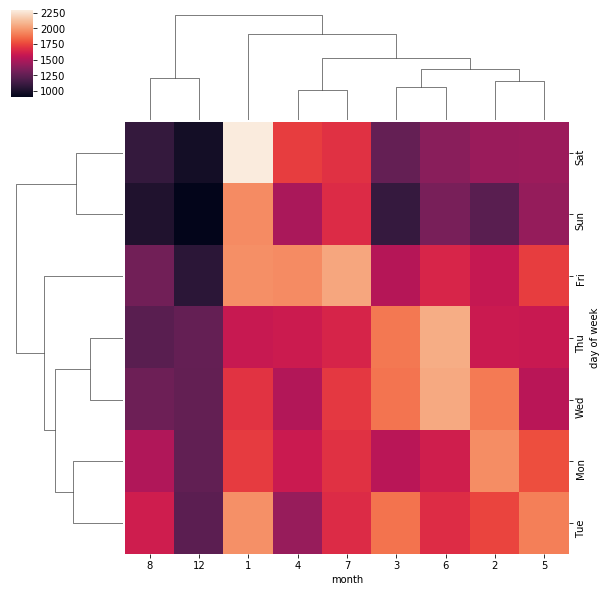

In [35]:
plt.figure(figsize=(12,6))
sns.clustermap(data=dayMonth)